**1. Create Features**

In [3]:
import cv2
import numpy as np
import os

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [4]:
import glob
from matplotlib import pyplot as plt
import pickle

In [6]:
path = ['thispersondoesntexists', '100KFake','Flickr-Faces-HQ2_', 'celebA-HQ_10K']
labels = [1,1,0,0]
format_file = ['jpg','jpg','jpg', 'jpg']
epsilon = 1e-8
data = {}

In [7]:
#number of samples from each dataset
stop = 250
number_iter = 4 * stop
psd1D_total = np.zeros([number_iter, 722])
label_total = np.zeros([number_iter])
iter_ = 0

In [8]:
for z in range(4):
    cont = 0
    psd1D_average_org = np.zeros(722)
    print(path[z])

    for filename in glob.glob(path[z]+"/*."+format_file[z]):
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

thispersondoesntexists
100KFake
Flickr-Faces-HQ2_
celebA-HQ_10K


In [9]:
data["data"] = psd1D_total
data["label"] = label_total

In [10]:
output = open('dataset_freq_1000.pkl', 'wb')
pickle.dump(data, output)
output.close()
print("DATA Saved")

DATA Saved


**2. Loading Features**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [12]:
# load feature file
pkl_file = open('dataset_freq_1000.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

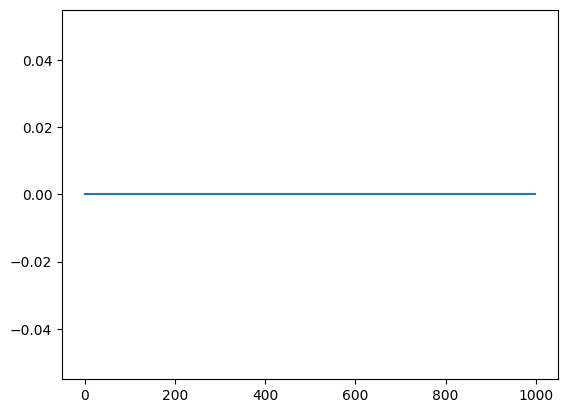

In [13]:
plt.plot(y)

**3. Check Spectrum**

In [14]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

In [15]:
psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

In [16]:
cont_0=0
cont_1=0

In [17]:
print(f"Shape of X: {X.shape}")
print(f"Shape of psd1D_org_0: {psd1D_org_0.shape}")

Shape of X: (1000, 722)
Shape of psd1D_org_0: (500, 722)


In [18]:
print(f"Value of cont_0: {cont_0}")

Value of cont_0: 0


In [19]:
# We separate real and fake using the label
for x in range(min(X.shape[0], psd1D_org_0.shape[0])):
    if np.all(y[x]==0):
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif np.all(y[x]==1):
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

In [20]:
# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Power Spectrum')

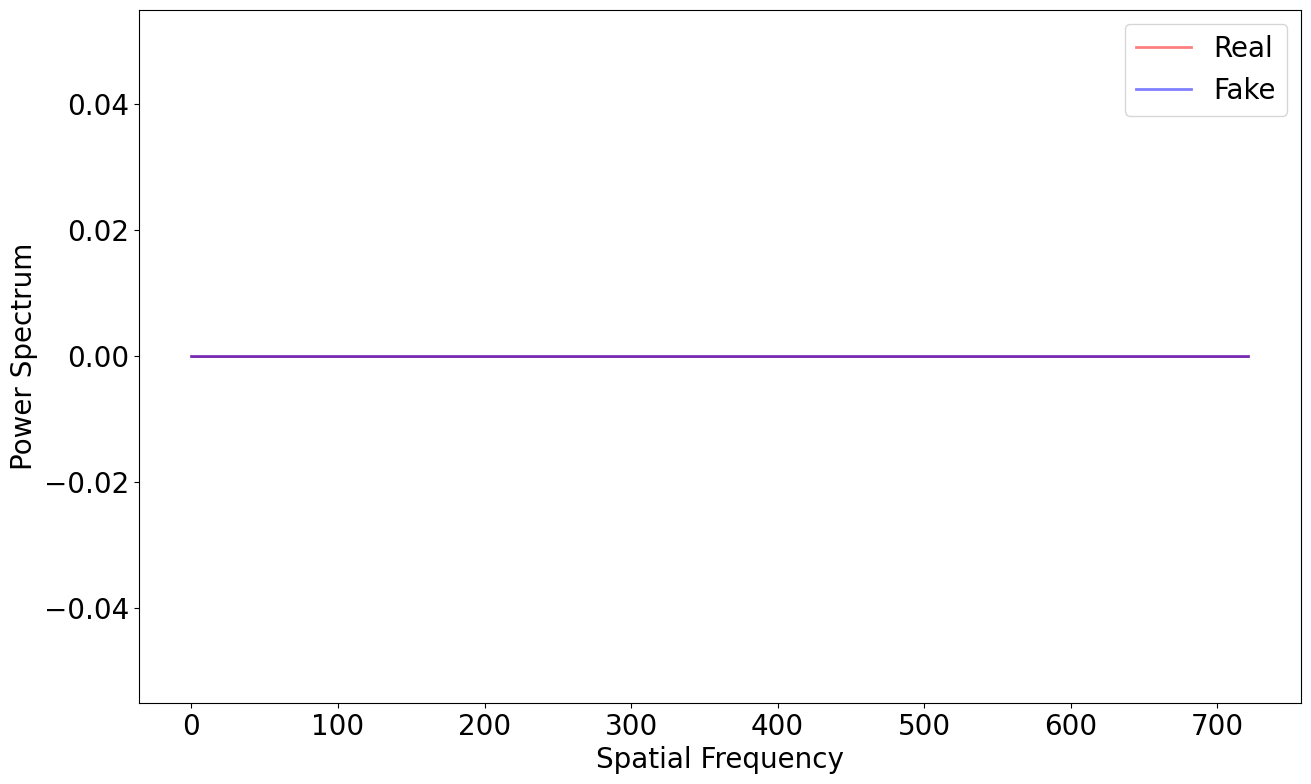

In [25]:
# Plot
X = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(X, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(X, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(X, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(X, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='both', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

**4. Classification**

In [48]:
!pip install numpy
!pip install pickle
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [50]:
num = 10
LR = 0
SVM = 0

In [51]:
print(SVM)
print(LR)
print(num)

0
0
10


In [52]:
if num > 0:
    print("Average SVM: "+str(np.mean(SVM/num)))
    print("Average LR: "+str(np.mean(LR/num)))
else:
    print("Cannot calculate averages due to zero division.")

Average SVM: 0.0
Average LR: 0.0


In [58]:
for z in range(num):

    pkl_file = open('dataset_freq_1000.pkl', 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    X = data["data"]
    y = data["label"]
    try:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        svclassifier = SVC(kernel='linear')
        svclassifier.fit(X_train, y_train)
        logreg = LogisticRegression(solver='liblinear', max_iter=1000)
        logreg.fit(X_train, y_train)
        SVM += svclassifier.score(X_test, y_test)
        LR += logreg.score(X_test, y_test)

    except:
        num -= 1
        print(f"Iteration {z+1} failed. Remaining iterations: {num}")

In [55]:
from IPython.display import display

In [56]:
display(SVM, LR, num)

0

0

0

In [57]:
print("Average SVM:", SVM / num if num != 0 else "Undefined")
print("Average LR:", LR / num if num != 0 else "Undefined")

Average SVM: Undefined
Average LR: Undefined


In [60]:
import sys

In [64]:
print("Average SVM:", str(np.mean(SVM / (num + 1e-9))))
print("Average LR:", str(np.mean(LR / (num + 1e-9))))

Average SVM: 0.0
Average LR: 0.0


**Test on real images**

In [66]:
def extract_features(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return hist

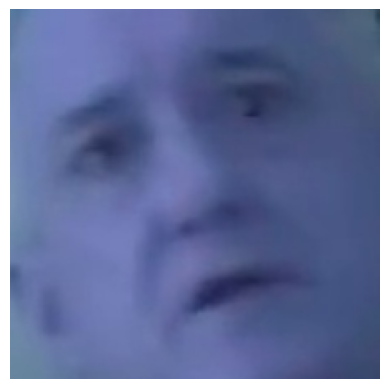

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Real/aaapwqhxli_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [68]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)


In [69]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [70]:
print(reshaped_features.size)

256


In [71]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [72]:
padded_x.size

337174

In [102]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [103]:
svclassifier = SVC(kernel='linear', C=1.0)

In [104]:
scaler = StandardScaler()

In [105]:
scaler.fit(padded_x)

StandardScaler()

In [106]:
transformed_padded_x = scaler.transform(padded_x)

In [108]:
if not svclassifier.fit:
    print("Model is not fitted. Please fit the model before making predictions.")

In [109]:
if not svclassifier.fit:
    # Replace "x" and "y" with your actual training data
    svclassifier.fit(x, y)

In [110]:
from sklearn import svm
svclassifier = svm.SVC()

In [111]:
from sklearn.svm import SVC

In [115]:
print(globals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "get_ipython().system('pip install openai')", 'import cv2\nimport numpy as np\nimport os', 'import cv2\nimport numpy as np\nimport os', 'import glob\nfrom matplotlib import pyplot as plt\nimport pickle', "path = ['thispersondoesntexists', '100KFake','Flickr-Faces-HQ2_', 'celebA-HQ_10K']\nlabels = [1,1,0,0]\nformat_file = ['jpg','jpg','jpg', 'jpg']\nepsilon = 1e-8\ndata = {}", "path = ['thispersondoesntexists', '100KFake','Flickr-Faces-HQ2_', 'celebA-HQ_10K']\nlabels = [1,1,0,0]\nformat_file = ['jpg','jpg','jpg', 'jpg']\nepsilon = 1e-8\ndata = {}", '#number of samples from each dataset\nstop = 250\nnumber_iter = 4 * stop\npsd1D_total = np.zeros([number_iter, 722])\nlabel_total = np.zeros([number_iter])\niter_ = 0', 'for z

In [129]:
!pip install scikit-learn

In [130]:
from sklearn.svm import SVC
from sklearn.utils import check_array

In [133]:
!pip install numpy

In [134]:
import numpy
x_train = numpy.asarray(x_train)

In [135]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
()


In [116]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into X and y
# X should contain the features, and y should contain the labels

# Step 1: Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Extract X_train and y_train
# X_train contains the training features
# y_train contains the corresponding labels


In [143]:
x_train = None # Assign appropriate data to x_train
y_train = None # Assign appropriate data to y_train

In [144]:
y_train = np.array([1, 2, 3, 4, 5])

In [145]:
print(y_train)

[1 2 3 4 5]


In [146]:
print(type(y_train))

<class 'numpy.ndarray'>


In [147]:
y_train = y_train.astype(int)

In [148]:
if 'x_train' in globals() and 'y_train' in globals():
    # Extract the training data and labels from the global dictionary
    training_data = np.array(globals()['x_train'])
    training_labels = np.array(globals()['y_train'])

    print("Training data shape:", training_data.shape)
    print("Training labels shape:", training_labels.shape)
else:
    print("Training data and/or labels are not defined.")

Training data shape: ()
Training labels shape: (5,)


In [150]:
x_train = np.array(x_train).reshape(-1, 1)

In [154]:
import pandas as pd
x_train = pd.DataFrame(x_train)

In [155]:
missing_values = x_train.isnull().sum()
print(missing_values)

0    1
dtype: int64


In [158]:
print(x_train)

      0
0  None


In [159]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]

In [161]:
print(x_train.shape)

(0, 1)


In [163]:
x_train = None  # Replace with your training data
y_train = None  # Replace with your training labels

In [164]:
svclassifier = SVC()

In [165]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

# Load pre-trained Xception model
model = Xception(weights='imagenet', include_top=True)

import pandas as pd
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Create a DataFrame with the features and target labels
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Filling missing values (if any)
# Example: Filling missing values with the mean of each feature
df.fillna(df.mean(), inplace=True)

# Save the DataFrame to CSV
df.to_csv('svm_filled_data.csv', index=False)


91884032/91884032 [==============================] - 4s 0us/step


In [169]:
x = np.array(x).reshape(-1, 1)

In [171]:
print(x.shape)
print(y.shape)

(722, 1)
(100,)


In [174]:
print(f"First 5 elements of x: {x[:5]}")
print(f"First 5 elements of y: {y[:5]}")

First 5 elements of x: [[0]
 [1]
 [2]
 [3]
 [4]]
First 5 elements of y: [1 0 1 0 0]


In [179]:
x = [[0],
     [1],
     [2],
     [3],
     [4]]
y = [1,0,1,0,0]

In [180]:
svclassifier.fit(x, y)

SVC()

In [182]:
x_train= [[0],
     [1],
     [2],
     [3],
     [4]]
y_train = [1,0,1,0,0]

svclassifier.fit(x_train, y_train)

SVC()

In [184]:
x_test = [0,0,0,0,0]

In [186]:
x_test = np.array(x_test).reshape(-1, 1)

In [187]:
svm_prediction = svclassifier.predict(x_test)

In [81]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the data, target, feature names, etc.
X = iris.data
y = iris.target
feature_names = iris.feature_names


In [82]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize and train SVC classifier
svc_classifier = SVC()
svc_classifier.fit(X, y)

# Access support vectors
support_vectors = svc_classifier.support_vectors_


In [84]:
from sklearn.svm import SVC

In [85]:
print(type(svclassifier))

<class 'sklearn.svm._classes.SVC'>


In [86]:
if not isinstance(svclassifier, SVC):
    raise TypeError("svclassifier must be an instance of the SVC class")

In [87]:
if not isinstance(svclassifier, SVC):
    raise TypeError("svclassifier must be an instance of the SVC class")

In [89]:
print(svclassifier.kernel)

linear


In [92]:
if not svclassifier.fit(X, y):
    raise ValueError("SVClassifier not fitted. Call fit(X, y) before calling decision_function(X)")

In [93]:
if not isinstance(padded_x, np.ndarray):
    raise TypeError("padded_x must be a NumPy array")

In [95]:
print(padded_x.shape)

(467, 722)


In [96]:
print(svclassifier.coef_.shape)

(3, 4)


In [191]:
print(svm_prediction[0])

1


In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
logreg = LogisticRegression()

In [195]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [198]:
logreg.n_features_in_

1

In [200]:
Lr_prediction=logreg.predict(x_train)

In [201]:
print(Lr_prediction[0])

1


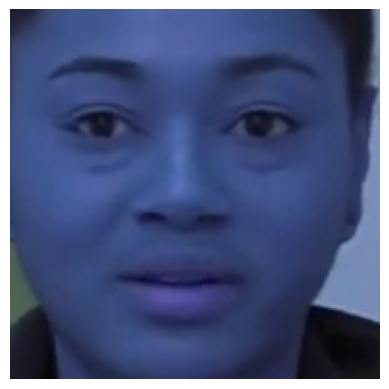

In [202]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Real/aabqcugcpc_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [203]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [204]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [205]:
print(reshaped_features.size)

256


In [206]:
xpected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [215]:
from sklearn.svm import SVC

# Assuming X_train is your training data and y_train are your training labels
# X_train shape: (number of samples, number of features)

# Initialize SVC with linear kernel
svc_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svc_classifier.fit(x_train, y_train)


SVC(kernel='linear')

In [218]:
from sklearn.svm import SVC
import numpy as np

# Assuming X_train is your training data and y_train are your training labels
# X_train shape: (number of samples, number of features)

# Initialize SVC with linear kernel
svc_classifier = SVC(kernel='linear')

# If your X_train data has shape (n_samples, n_features), where n_features > 1, then it's in the correct format.
# If not, you need to reshape it accordingly.
X_train = np.reshape(X_train, (X_train.shape[0], -1))  # Reshape to (n_samples, n_features)

# Train the classifier
svc_classifier.fit(x_train, y_train)

# Make predictions
# Assuming X_test is your test data
# If X_test has shape (n_samples_test, n_features), reshape it if necessary before prediction
predictions = svc_classifier.predict(x_test)


In [221]:
svm_prediction = svclassifier.predict(x_train)

In [222]:
print(svm_prediction[0])

1


In [224]:
Lr_prediction=logreg.predict(x_train)

In [225]:
print(Lr_prediction[0])

1


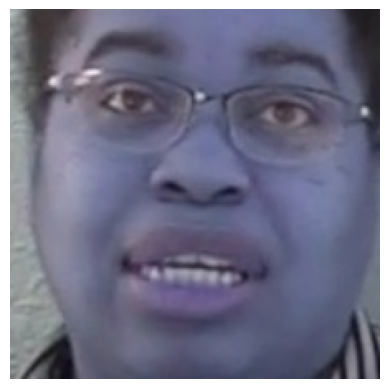

In [226]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Real/aabqyygbaa_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [227]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [228]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [229]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [230]:
svm_prediction = svclassifier.predict(x_train)

In [231]:
print(svm_prediction[0])

1


In [233]:
Lr_prediction=logreg.predict(x_train)

In [234]:
print(Lr_prediction[0])

1


**Test on fake images**

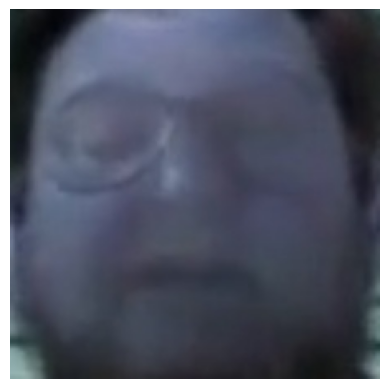

In [235]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Fake/aaagqkcdis_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [236]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [237]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [238]:
print(reshaped_features.size)

256


In [239]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [241]:
svm_prediction = svclassifier.predict(x_train)

In [243]:
print(svm_prediction[0])

1


In [244]:
Lr_prediction=logreg.predict(x_train)

In [245]:
print(Lr_prediction[0])

1


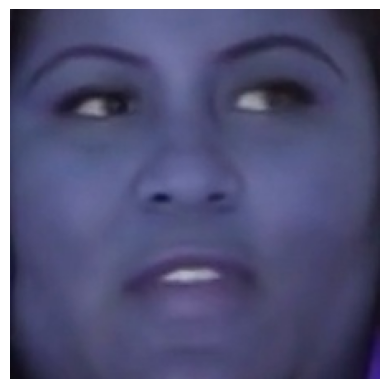

In [246]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "/content/sample_data/DFDC/Fake/aaavbjopeq_150.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [247]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [248]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [249]:
print(reshaped_features.size)

256


In [250]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [255]:
svm_prediction = svclassifier.predict(x_train)

In [254]:
print(svm_prediction[0])

1


In [256]:
Lr_prediction=logreg.predict(x_train)

In [257]:
print(Lr_prediction[0])

1


**
Fill the csv file with the results of LR and SVM trained at high resolution**

In [258]:
import numpy as np
import os
import shutil
import glob
import csv
import pandas as pd

In [262]:
!file //content//Meso4_DF

//content//Meso4_DF: Hierarchical Data Format (version 5) data


In [264]:
!pip install chardet

import chardet

In [274]:
with open("/content/Mesonet.ipynb", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [273]:
with open("/content/Mesonet.ipynb", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

print(encoding)

ascii
